# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
%%time
data = get_date_list(data)
data = run_engine(data)

 98%|████████████████████████████▌| 1885942/1918514 [01:37<00:01, 19170.92it/s]

pls    0.00729
dtype: float64
--------------------------------------
                   date ord_types               close_type      pls
114 2021-01-27 15:19:10      long  simple_slema_move_close  0.00003
115 2021-01-27 16:39:57      long       simple_take_profit  0.00200
116 2021-01-27 19:16:20      long  simple_slema_move_close  0.00006
117 2021-01-27 20:17:17     short  simple_slema_move_close  0.00002
118 2021-01-28 00:23:15      long              simple_stop -0.00200
119 2021-01-28 01:53:44     short              simple_stop -0.00200
120 2021-01-28 08:09:30     short              simple_stop -0.00201
121 2021-01-28 13:51:10     short              simple_stop -0.00200
122 2021-01-28 16:01:33      long              simple_stop -0.00201
123 2021-01-29 03:04:38     short       simple_take_profit  0.00200
124 2021-01-29 06:16:05     short  simple_slema_move_close  0.00001
125 2021-01-29 08:06:48      long  simple_slema_move_close  0.00001
126 2021-01-29 09:22:39      long  simple_slema

100%|█████████████████████████████| 1918514/1918514 [01:38<00:00, 19461.86it/s]

Wall time: 1min 59s


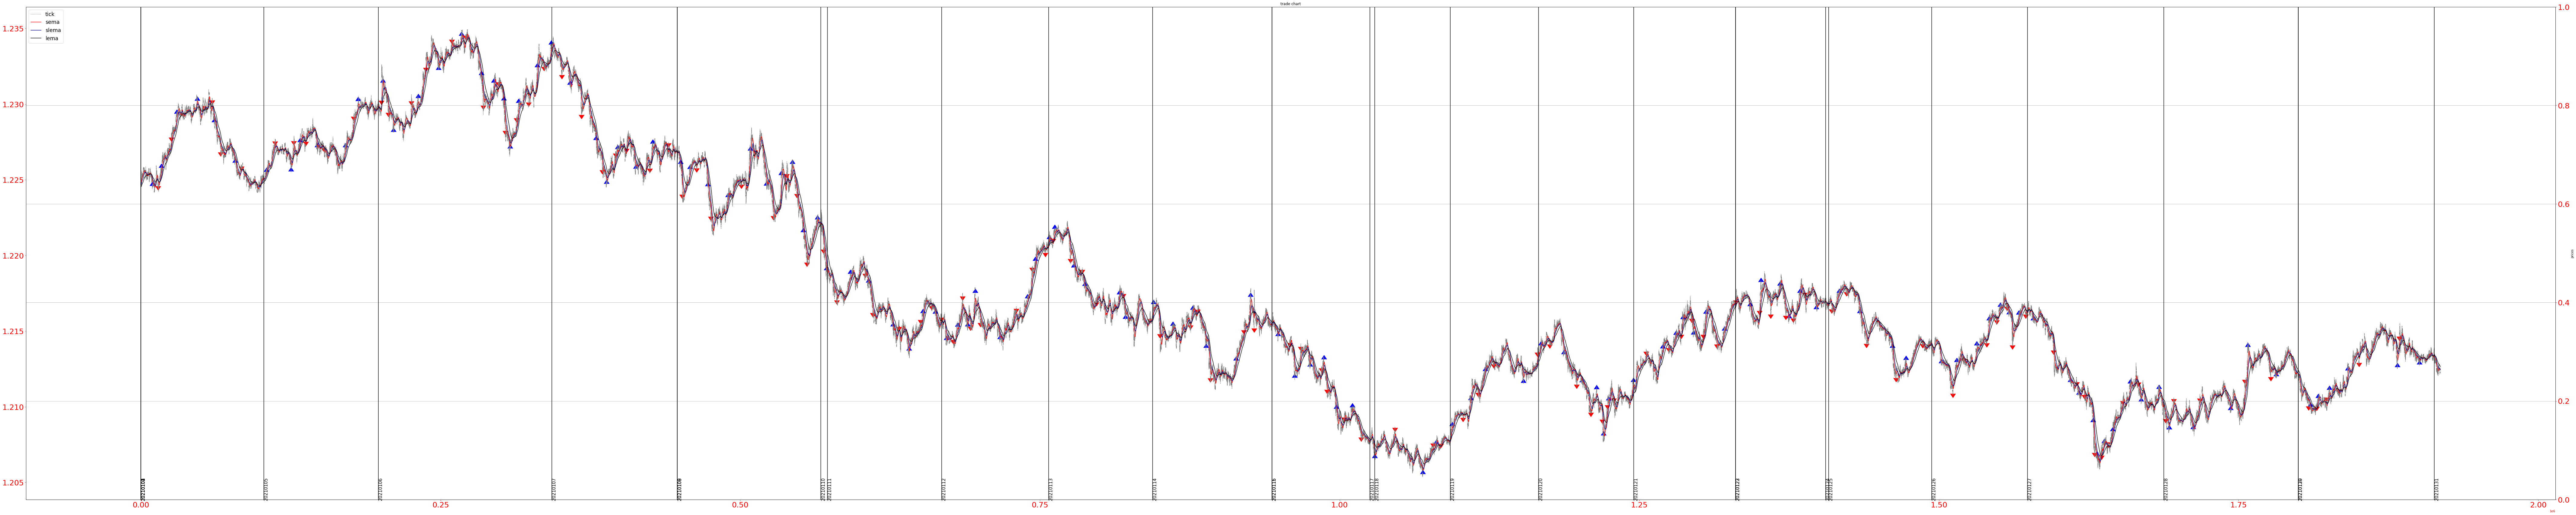

-----------------------------------------------------
date_val          : ['20210101', '20210102', '20210103', '20210104', '20210105', '20210106', '20210107', '20210108', '20210109', '20210110', '20210111', '20210112', '20210113', '20210114', '20210115', '20210116', '20210117', '20210118', '20210119', '20210120', '20210121', '20210122', '20210123', '20210124', '20210125', '20210126', '20210127', '20210128', '20210129', '20210130', '20210131']
Total PL : 0.007289999999999989
-------------
net_pl            : 0.00729/0.13607
-------------
+ve               : num= 97    sum= +0.07168    avg= +0.00074
-ve               : num= 32    sum= -0.06439    avg= -0.00201
-----------------------------------------------------
month_val
1    0.00729
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    66
simple_stop                32
simple_take_profit         31
Name: close_type, dtype: int64
-----------------------------------------------------


In [3]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')

In [4]:
data['report_df'].groupby(['date_val'])['pls'].sum()

date_val
4     0.00431
5     0.00204
6    -0.00191
7     0.00006
8     0.00697
10   -0.00200
11    0.00278
12    0.00055
13   -0.00071
14   -0.00004
15   -0.00491
18   -0.00400
19   -0.00052
20    0.00022
21    0.00002
22   -0.00181
25    0.00509
26    0.00447
27    0.00618
28   -0.01002
29    0.00052
Name: pls, dtype: float64

In [5]:
data['report_df'].loc[data['report_df']['pls'] < 0, ['date', 'ord_types', 'close_type', 'pls']]

,date,ord_types,close_type,pls
7,2021-01-05 08:17:43,short,simple_stop,-0.00200
12,2021-01-06 01:18:10,long,simple_stop,-0.00200
13,2021-01-06 04:23:23,short,simple_stop,-0.00200
15,2021-01-06 10:01:55,short,simple_stop,-0.00200
20,2021-01-06 16:54:28,short,simple_stop,-0.00200
23,2021-01-07 02:24:31,long,simple_stop,-0.00200
26,2021-01-07 12:26:25,short,simple_stop,-0.00200
37,2021-01-08 17:20:59,long,simple_stop,-0.00201
39,2021-01-10 23:07:46,long,simple_stop,-0.00200
44,2021-01-11 16:15:19,short,simple_stop,-0.00200
